In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/2017.csv')
df.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [15]:
df[['Economy..GDP.per.Capita.', 'Happiness.Score']].corr()

,Economy..GDP.per.Capita.,Happiness.Score
Economy..GDP.per.Capita.,1.000000,0.812469
Happiness.Score,0.812469,1.000000


In [17]:
df[['Trust..Government.Corruption.', 'Happiness.Score']].corr()

,Trust..Government.Corruption.,Happiness.Score
Trust..Government.Corruption.,1.00000,0.42908
Happiness.Score,0.42908,1.00000


In [19]:
df[['Freedom', 'Happiness.Score']].corr()

,Freedom,Happiness.Score
Freedom,1.000000,0.570137
Happiness.Score,0.570137,1.000000


In [20]:
df[['Health..Life.Expectancy.', 'Happiness.Score']].corr()

,Health..Life.Expectancy.,Happiness.Score
Health..Life.Expectancy.,1.000000,0.781951
Happiness.Score,0.781951,1.000000


In [3]:
df.keys()

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [5]:
from sklearn.preprocessing import scale, minmax_scale, robust_scale

In [21]:
scaler = preprocessing.MinMaxScaler()
scaled = scaler.fit_transform(df[['Economy..GDP.per.Capita.', 'Health..Life.Expectancy.']])
scaled_df = pd.DataFrame(scaled, index=df['Country'], columns=['GDP_per_capita', 'Health'])
scaled_df.head()

,GDP_per_capita,Health
Country,,
Norway,0.864065,0.839045
Denmark,0.792394,0.834726
Iceland,0.791458,0.877892
Switzerland,0.836545,0.903779
Finland,0.771648,0.852200


In [22]:
from sklearn.cluster import KMeans
score = []

In [23]:
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(scaled)
    score.append(kmeans.inertia_)

score

[17.39210555019636,
 5.675751113709563,
 3.119583066651895,
 2.3658863402219206,
 1.93105965831976,
 1.6340719215477975,
 1.417890902314777,
 1.2241663818336157,
 1.0876591011387684,
 0.9897876094909003]

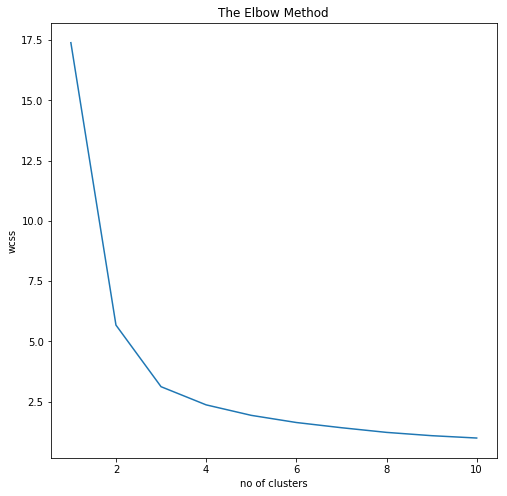

In [24]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.figure(figsize=(8, 8))
plt.plot(range(1,11), score)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [25]:
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=77)
y_kmeans= kmeansmodel.fit_predict(scaled)

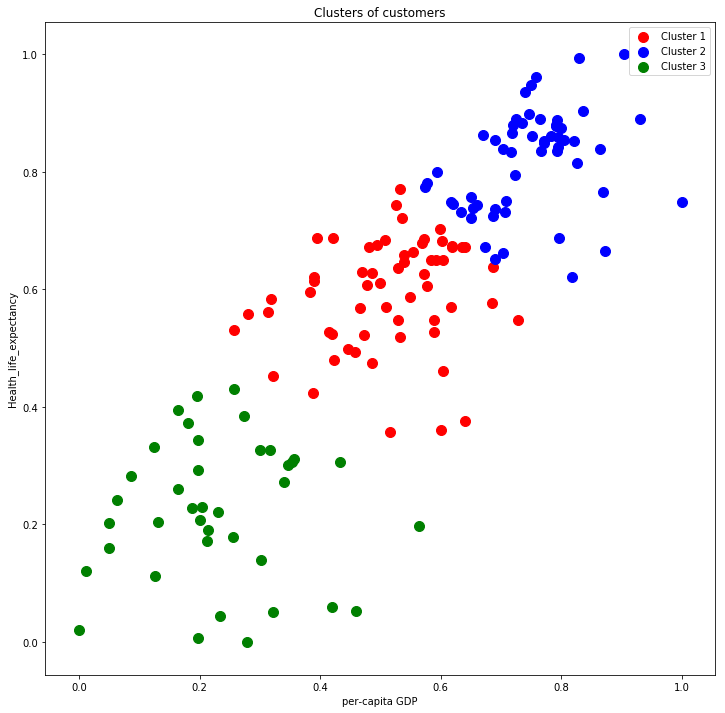

In [26]:
#Visualizing all the clusters 
plt.figure(figsize=(12, 12))
plt.scatter(scaled[y_kmeans == 0, 0], scaled[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(scaled[y_kmeans == 1, 0], scaled[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(scaled[y_kmeans == 2, 0], scaled[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of customers')
plt.xlabel('per-capita GDP')
plt.ylabel('Health_life_expectancy')
plt.legend()
plt.show()
